# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

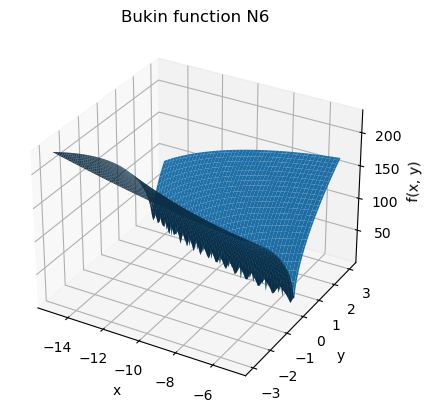

In [9]:
import numpy as np

def bukin_function(x, y):
    term1 = 100 * np.sqrt(np.abs(y - 0.01 * x ** 2))
    term2 = 0.01 * np.abs(x + 10)
    return term1 + term2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of x and y values to plot
x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = bukin_function(X, Y)

# Create the figure and 3D axes
fig = plt.figure()
ax = plt.axes(projection ='3d') 

# Plot the surface
ax.plot_surface(X, Y, Z)

# Set axis labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Bukin function N6')

# Show the plot
plt.show()

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [17]:
import numpy as np

# Define the Bukin function N6
def bukin_function(x, y):
    term1 = 100 * np.sqrt(np.abs(y - 0.01 * x ** 2))
    term2 = 0.01 * np.abs(x + 10)
    return term1 + term2

# Define the state as a tuple (x, y)
# Choose an initial state randomly within the search space
initial_state = (-9.99, 1)

# Define the neighbour function by randomly perturbing the current state
def neighbour(state, step_size=0.01):
    x, y = state
    new_x = x + np.random.uniform(-step_size, step_size)
    new_y = y + np.random.uniform(-step_size, step_size)
    return (new_x, new_y)

# Define the stop criteria
max_iterations = 10000
tolerance = 1e-6

# Define the Hill Climbing algorithm
def hill_climbing(start_state, neighbour_fn, objective_fn, max_iterations, tolerance):
    current_state = start_state
    current_objective = objective_fn(*current_state)
    for i in range(max_iterations):
        # Generate a neighbour state
        neighbour_state = neighbour_fn(current_state)
        # Evaluate the neighbour state
        neighbour_objective = objective_fn(*neighbour_state)
        # Check if the neighbour is better than the current state
        if neighbour_objective < current_objective:
            current_state = neighbour_state
            current_objective = neighbour_objective
            # Print the current state and objective
            print(f"Iteration {i}: {current_state}, {current_objective}")
        # Check if the objective has converged
        if np.abs(current_objective) < tolerance:
            print(f"Converged at iteration {i} with objective {current_objective}")
            return current_state
    print(f"Stopped after {max_iterations} iterations without convergence")
    return current_state

# Apply the Hill Climbing algorithm to find the minimum point of the Bukin function N6
minimum_point = hill_climbing(initial_state, neighbour, bukin_function, max_iterations, tolerance)

print("Minimum point:", minimum_point)
print("Minimum objective:", bukin_function(*minimum_point))


Iteration 3: (-9.98438598161565, 0.9984701651696573), 3.9883021641228575
Iteration 10: (-9.97791489327253, 0.9950159503759207), 2.3916760523556992
Iteration 13: (-9.981857758165173, 0.9964775693206862), 1.01372115160358
Iteration 49: (-9.99073891266906, 0.9980819857832259), 0.8165142419666614
Iteration 268: (-9.983049136304784, 0.9965869613587492), 0.5075078573510261
Iteration 293: (-9.98632154893631, 0.9972789286897871), 0.3571788309156946
Iteration 449: (-9.981168796845115, 0.9962434783267354), 0.24863982822535083
Iteration 3831: (-9.990849576557354, 0.9981705699670801), 0.042828710800513876
Stopped after 10000 iterations without convergence
Minimum point: (-9.990849576557354, 0.9981705699670801)
Minimum objective: 0.042828710800513876


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [11]:
import numpy as np

# Define the problem data
weights = np.array([1, 3, 2, 5, 4])
values = np.array([2, 7, 4, 12, 8])
capacity = 10

# Define the objective function as the total value of the selected items
def objective_fn(state):
    return np.sum(state * values)

# Define the neighbour function as randomly switching a zero to a one in the state
def neighbour_fn(state):
    zero_indices = np.where(state == 0)[0]
    if len(zero_indices) > 0:
        i = np.random.choice(zero_indices)
        new_state = np.copy(state)
        new_state[i] = 1
        return new_state
    else:
        return state

# Define the stop criteria
max_iterations = 100

# Define the Hill Climbing algorithm
def hill_climbing(start_state, neighbour_fn, objective_fn, max_iterations):
    current_state = start_state
    current_objective = objective_fn(current_state)
    for i in range(max_iterations):
        # Generate a neighbour state
        neighbour_state = neighbour_fn(current_state)
        # Evaluate the neighbour state
        neighbour_objective = objective_fn(neighbour_state)
        # Check if the neighbour is better than the current state and within the capacity constraint
        if neighbour_objective > current_objective and np.sum(weights * neighbour_state) <= capacity:
            current_state = neighbour_state
            current_objective = neighbour_objective
            # Print the current state and objective
            print(f"Iteration {i}: {current_state}, {current_objective}")
    print(f"Stopped after {max_iterations} iterations")
    return current_state

# Apply the Hill Climbing algorithm to the Knapsack problem
n = len(weights)
start_state = np.zeros(n, dtype=int)
minimum_state = hill_climbing(start_state, neighbour_fn, objective_fn, max_iterations)

# Calculate the minimum objective value and the items selected in the Knapsack
minimum_objective = objective_fn(minimum_state)
selected_indices = np.where(minimum_state == 1)[0]
selected_weights = weights[selected_indices]
selected_values = values[selected_indices]

print("Minimum objective:", minimum_objective)
print("Selected items:")
for i in range(len(selected_indices)):
    print(f"Item {selected_indices[i]}: weight={selected_weights[i]}, value={selected_values[i]}")


Iteration 0: [0 0 1 0 0], 4
Iteration 1: [0 1 1 0 0], 11
Iteration 2: [0 1 1 0 1], 19
Iteration 3: [1 1 1 0 1], 21
Stopped after 100 iterations
Minimum objective: 21
Selected items:
Item 0: weight=1, value=2
Item 1: weight=3, value=7
Item 2: weight=2, value=4
Item 4: weight=4, value=8



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [8]:
import numpy as np

# Define the problem data
weights = np.array([1, 3, 2, 5, 4])
values = np.array([2, 7, 4, 12, 8])
capacity = 10

# Define the objective function as the total value of the selected items
def objective_fn(state):
    return np.sum(state * values)

# Define the neighbour function as randomly selecting k zeros and flipping them to ones in the state
def neighbour_fn(state):
    zero_indices = np.where(state == 0)[0]
    if len(zero_indices) > 0:
        i = np.random.choice(zero_indices)
        new_state = np.copy(state)
        new_state[i] = 1
        return new_state
    else:
        return state

# Define the stop criteria
max_iterations = 1000
num_restarts = 10

# Define the Hill Climbing algorithm with random restarts and randomized neighbour selection
def hill_climbing(start_state, neighbour_fn, objective_fn, max_iterations, num_restarts):
    best_state = start_state
    best_objective = objective_fn(start_state)
    for i in range(num_restarts):
        current_state = start_state
        current_objective = objective_fn(current_state)
        for j in range(max_iterations):
            # Generate a neighbour state
            neighbour_state = neighbour_fn(current_state)
            # Evaluate the neighbour state
            neighbour_objective = objective_fn(neighbour_state)
            # Check if the neighbour is better than the current state and within the capacity constraint
            if neighbour_objective > current_objective and np.sum(weights * neighbour_state) <= capacity:
                current_state = neighbour_state
                current_objective = neighbour_objective
        # Check if the current state is better than the best state found so far
        if current_objective > best_objective:
            best_state = current_state
            best_objective = current_objective
    return best_state

# Apply the Hill Climbing algorithm with randomized neighbour selection and random restarts to the Knapsack problem
n = len(weights)
start_state = np.zeros(n, dtype=int)
minimum_state = hill_climbing(start_state, neighbour_fn, objective_fn, max_iterations, num_restarts)

# Calculate the minimum objective value and the items selected in the Knapsack
minimum_objective = objective_fn(minimum_state)
selected_indices = np.where(minimum_state == 1)[0]
selected_weights = weights[selected_indices]
selected_values = values[selected_indices]

# Print the results
print("Selected items: ", selected_indices)
print("Total weight: ", np.sum(selected_weights))
print("Total value: ", np.sum(selected_values))
print("Minimum objective value: ", minimum_objective)


Selected items:  [1 2 3]
Total weight:  10
Total value:  23
Minimum objective value:  23
